<a href="https://colab.research.google.com/github/geraldalivia/Air-Quality-Analysis/blob/main/Proyek_Analisis_Data_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: Air Quality Dataset

**Author:** Geralda Livia Nugraha<br>
**Email:** mc299d5x1168@student.devacademy.id<br>
**ID Dicoding:** [MC299D5X1168](https://www.dicoding.com/users/alddar/)<br>


## Define Questions

1. What is the daily pattern of PM10 concentrations at Dongsi and Wanliu stations for the period 2013-2017?<br>
2. Is there a correlation between meteorological factors (TEMP, DEWP and PRES) and PM10 concentration levels at the two stations (Dongsi and Wanliu)?<br>


## Library

In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from datetime import datetime
from google.colab import drive

In [68]:
session_info.show()

/usr/local/lib/python3.11/dist-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


## Data Wrangling (Preparation)

### Gathering Data
Load data from Air Quality Dataset use gdrive with the focuse of Dongsi and Wanliu Station<br>

In [ ]:
# To access data in gdrive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [24]:
# Load data Dongsi Station
dongsiDf = pd.read_csv("/content/drive/MyDrive/Submission/Analisis Data/Data/Air-Quality-Dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsiDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [25]:
# Load Data Wanliu Station
wanliuDf = pd.read_csv("/content/drive/MyDrive/Submission/Analisis Data/Data/Air-Quality-Dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliuDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [26]:
# Combined Data Dongsi and Wanliu
df = pd.concat([dongsiDf, wanliuDf], ignore_index=True)
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [27]:
# Save the combine data
df.to_csv("/content/drive/MyDrive/Submission/Analisis Data/Data/Data_Dongsi_Wanliu.csv", index=False)

### Accessing Data

Accessing Data to knowing the data, especially missing value and diplicate data<br>

In [28]:
# Get to know the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    68996 non-null  float64
 6   PM10     69291 non-null  float64
 7   SO2      68890 non-null  float64
 8   NO2      67457 non-null  float64
 9   CO       65119 non-null  float64
 10  O3       67357 non-null  float64
 11  TEMP     70088 non-null  float64
 12  PRES     70088 non-null  float64
 13  DEWP     70088 non-null  float64
 14  RAIN     70088 non-null  float64
 15  wd       69927 non-null  object 
 16  WSPM     70100 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 9.6+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,68996.000000,69291.000000,68890.000000,67457.000000,65119.000000,67357.000000,70088.000000,70088.000000,70088.000000,70088.000000,70100.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.776987,110.400928,18.453695,59.524612,1324.597368,53.131428,13.550177,1011.822477,2.857061,0.066141,1.681000
std,10122.177085,1.177205,3.448728,8.800155,6.922236,84.271429,95.534776,22.757910,36.510177,1231.128017,56.775386,11.403375,10.336130,13.750540,0.843310,1.209092
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,4.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.400000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,10.000000,53.000000,900.000000,39.000000,14.500000,1011.500000,3.500000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,118.000000,152.000000,24.000000,81.000000,1600.000000,77.000000,23.200000,1020.100000,15.400000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,955.000000,300.000000,264.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,72.500000,11.200000


In [29]:
# Get to know the detail of data
check = df.head()
columns = df.columns
datatypes = df.dtypes

check, columns, datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
 1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
 2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
 3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
 4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
 1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
 2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
 3  1026.2 -25.5   0.0    N   4.9  Dongsi  
 4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour       

In [30]:
# To Know Missing Values
missing_values = df.isnull().sum()
print("\nJumlah missing values:")
print(missing_values)


Jumlah missing values:
No            0
year          0
month         0
day           0
hour          0
PM2.5      1132
PM10        837
SO2        1238
NO2        2671
CO         5009
O3         2771
TEMP         40
PRES         40
DEWP         40
RAIN         40
wd          201
WSPM         28
station       0
dtype: int64


In [31]:
# To know Missing Precentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase missing values:")
print(missing_percentage)


Persentase missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.614191
PM10       1.193532
SO2        1.765343
NO2        3.808750
CO         7.142653
O3         3.951346
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.286619
WSPM       0.039927
station    0.000000
dtype: float64


In [32]:
# To Check Duplicate Data
duplicate = df.duplicated().sum()
print(f"Total duplicate: {duplicate}")

Total duplicate: 0


In [33]:
# To Check Data Again
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,68996.000000,69291.000000,68890.000000,67457.000000,65119.000000,67357.000000,70088.000000,70088.000000,70088.000000,70088.000000,69927,70100.000000,70128
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10243,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.776987,110.400928,18.453695,59.524612,1324.597368,53.131428,13.550177,1011.822477,2.857061,0.066141,NaN,1.681000,NaN
std,10122.177085,1.177205,3.448728,8.800155,6.922236,84.271429,95.534776,22.757910,36.510177,1231.128017,56.775386,11.403375,10.336130,13.750540,0.843310,NaN,1.209092,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,4.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.400000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,10.000000,53.000000,900.000000,39.000000,14.500000,1011.500000,3.500000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,118.000000,152.000000,24.000000,81.000000,1600.000000,77.000000,23.200000,1020.100000,15.400000,0.000000,NaN,2.200000,NaN


**Accessing Data INSIGHT**<br>
- There is a considerable amount of missing values for some pollutants. In terms of percentage, this number is still relatively small for **PM10 (around 1.53%)**, indicating that most of the data is still available for analysis<br>
- **Zero duplicate data** found in the dataset<br>

## Cleaning Data

- Fill imputation for missing values (See the changes comparison between the table in Table detail of data and the table check data again)<br>


In [34]:
# Imputation Missing Values
data_numeric = df.select_dtypes(include=['float64', 'int64']).columns
for coloumn in data_numeric:
    df[coloumn].fillna(df[coloumn].median(), inplace=True)

<ipython-input-34-8f043f0d05e1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coloumn].fillna(df[coloumn].median(), inplace=True)


In [35]:
# Check again the new data
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0  300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0  300.0  88.0   
2          3  2013      3    1     2    7.0   7.0  10.0  17.0  300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0  900.0  39.0   
4          5  2013      3    1     4    3.0   3.0   7.0  53.0  200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
70123  35060  2017      2   28    19   11.0  27.0   4.0  20.0  300.0  81.0   
70124  35061  2017      2   28    20   15.0  43.0   6.0  55.0  500.0  45.0   
70125  35062  2017      2   28    21   13.0  35.0   7.0  48.0  500.0  48.0   
70126  35063  2017      2   28    22   12.0  31.0   5.0  47.0  500.0  50.0   
70127  35064  2017      2   28    23    7.0  25.0   6.0  86.0  700.0  11.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.

## Exploratory Data Analysis (EDA)<br>


In [36]:
# Check the unique stations in our dataset
print("\nUnique stations:")
print(df['station'].unique())


Unique stations:
['Dongsi' 'Wanliu']


In [38]:
# Filter data for Dongsi and Wanliu stations
dongsi_data = df[df['station'] == 'Dongsi']
wanliu_data = df[df['station'] == 'Wanliu']

In [63]:
# Create a datetime column for easier analysis
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Groupby for Daily
daily_pm10 = df.groupby(['station', pd.Grouper(key='datetime', freq='D')])['PM10'].mean().reset_index()
station_daily = daily_pm10[daily_pm10['station'].isin(['Dongsi', 'Wanliu'])]

pm10_pivot = station_daily.pivot(index='datetime', columns='station', values='PM10')


# Groupby for Hourly
hourly_pm10 = df[df['station'].isin(['Dongsi', 'Wanliu'])].groupby(['station', 'hour'])['PM10'].mean().reset_index()

# Group PM10 by day of week to identify weekly patterns
df['day_of_week'] = df['datetime'].dt.dayofweek
dow_pm10 = df[df['station'].isin(['Dongsi', 'Wanliu'])].groupby(['station', 'day_of_week'])['PM10'].mean().reset_index()

# Groupby for Monthly
monthly_pm10 = df[df['station'].isin(['Dongsi', 'Wanliu'])].groupby(['station', 'year', 'month'])['PM10'].mean().reset_index()
monthly_pm10['month_year'] = pd.to_datetime(monthly_pm10[['year', 'month']].assign(day=1))


In [55]:
# Define station and meteorological factors
stations = ['Dongsi', 'Wanliu']
meteo_factors = ['TEMP', 'DEWP', 'PRES']

### Data Visualization

#### 1. Daily pattern of PM10 concentrations at Dongsi and Wanliu stations (2013-2017)

<Figure size 1400x700 with 0 Axes>

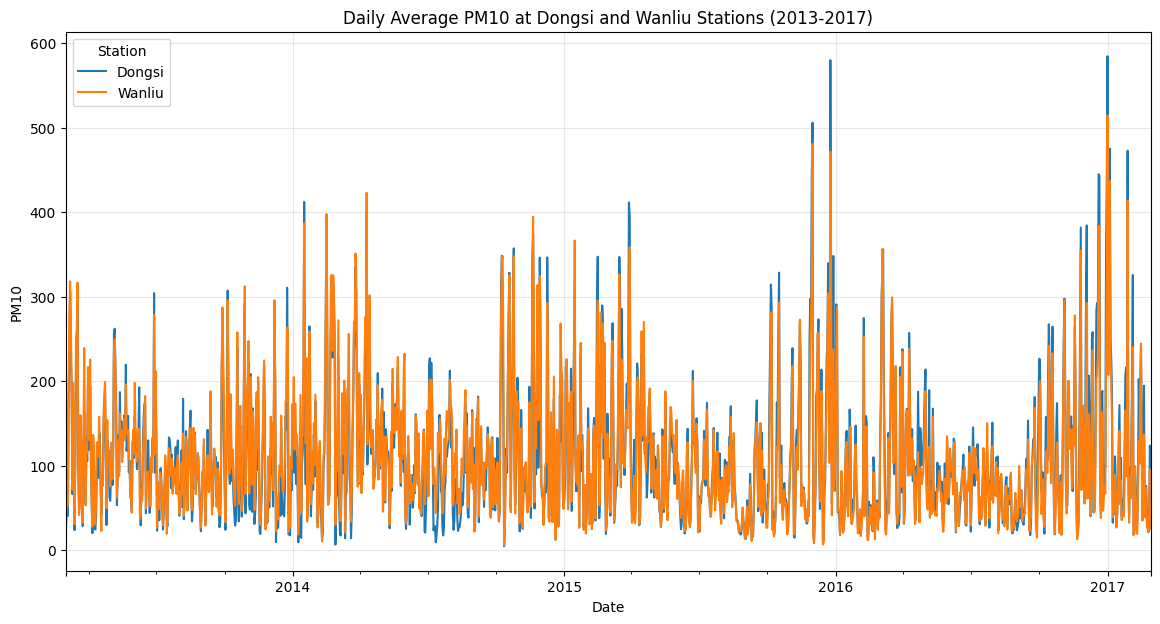

In [48]:
# Daily Average Pattern PM10 for Dongsi & Wanliu
plt.figure(figsize=(14, 7))
pm10_pivot.plot(figsize=(14, 7))
plt.title('Daily Average PM10 at Dongsi and Wanliu Stations (2013-2017)')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.legend(title='Station')
plt.savefig('daily_pm10_trend.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight Daily Pattern**: <br>
- Pattern: PM10 levels at both stations fluctuated sharply over time. There were some large spikes that occurred in 2016 and 2017 indicating periods of very high air pollution <br>
- Trend: there is no clear decreasing or increasing trend over the period of 2013-2017, indicating that air pollution levels remain an ongoing issue at both stations <br>

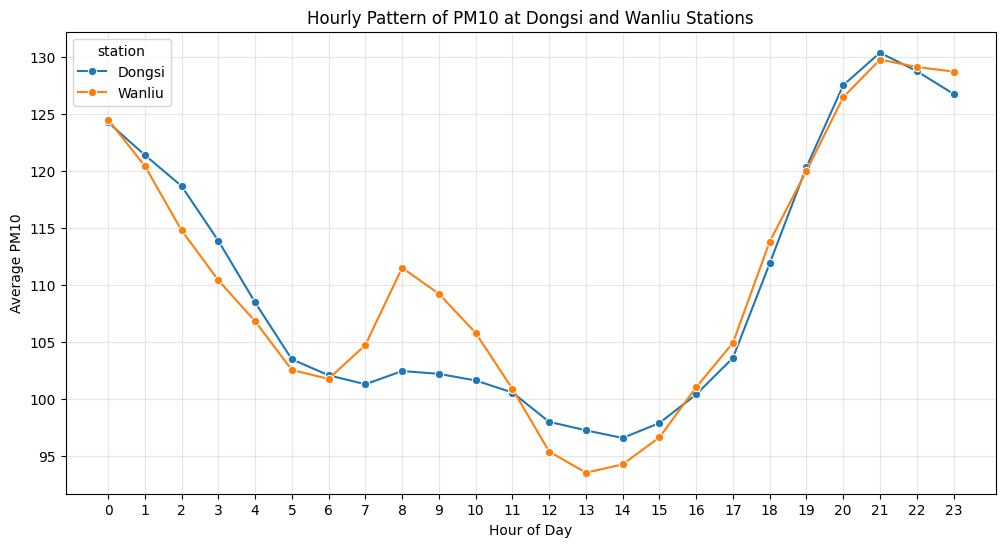

In [49]:
# Hourly Pattern (time of day)
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='PM10', hue='station', data=hourly_pm10, marker='o')
plt.title('Hourly Pattern of PM10 at Dongsi and Wanliu Stations')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM10')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.savefig('hourly_pm10_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight Hourly Pattern**: <br>
- Highest pollution in the evening (8-10PM)<br>
- Lowest pollution during the day (12-2PM)<br>
- Pattern: PM10 in Dongsi and Wanliu are similar, suggesting sources or activities affecting both locations simultaneously<br>

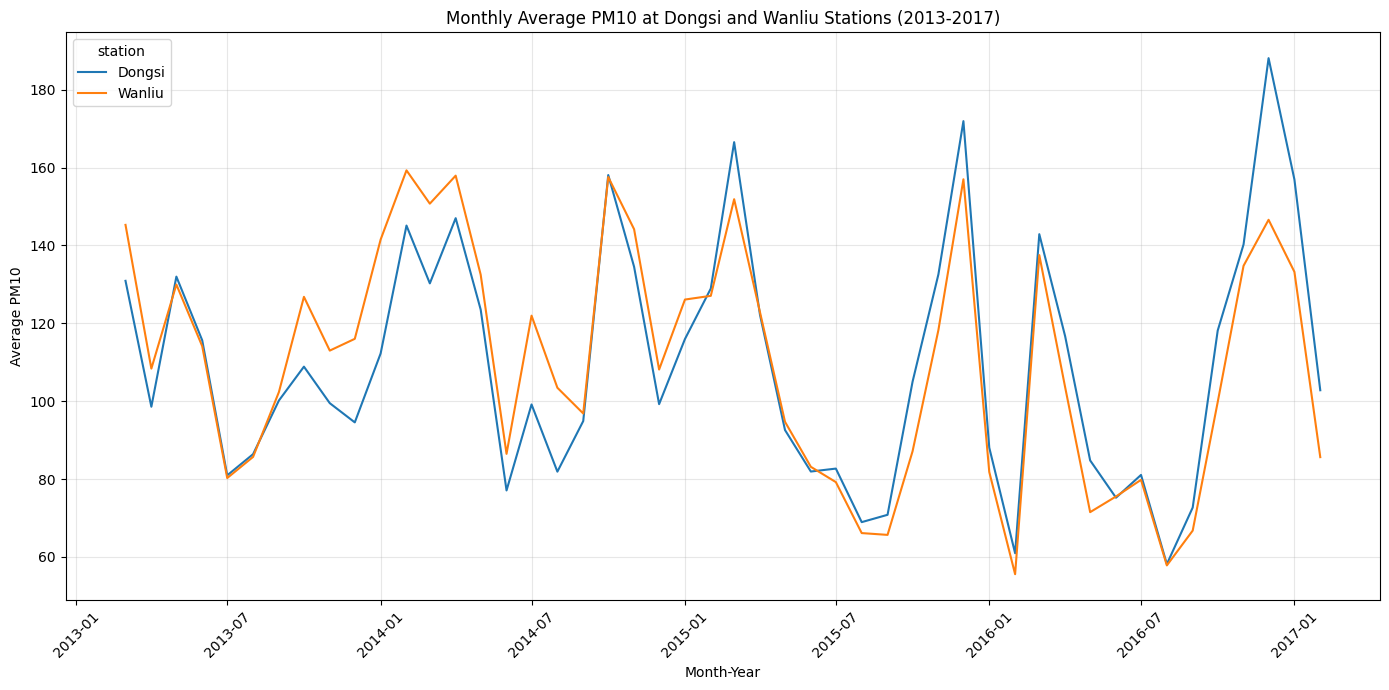

In [69]:
# Monthly patterns (for seasonal trends)
plt.figure(figsize=(14, 7))
sns.lineplot(x='month_year', y='PM10', hue='station', data=monthly_pm10)
plt.title('Monthly Average PM10 at Dongsi and Wanliu Stations (2013-2017)')
plt.xlabel('Month-Year')
plt.ylabel('Average PM10')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_pm10_trend.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight Monthly Pattern**: <br>
- Pattern: both stations are almost identical, suggesting similar pollution sources or environmental factors affecting both locations simultaneousl<br>
- Trend: there is no clear long-term increasing or decreasing trend in PM10 levels from 2013 to 2017<br>

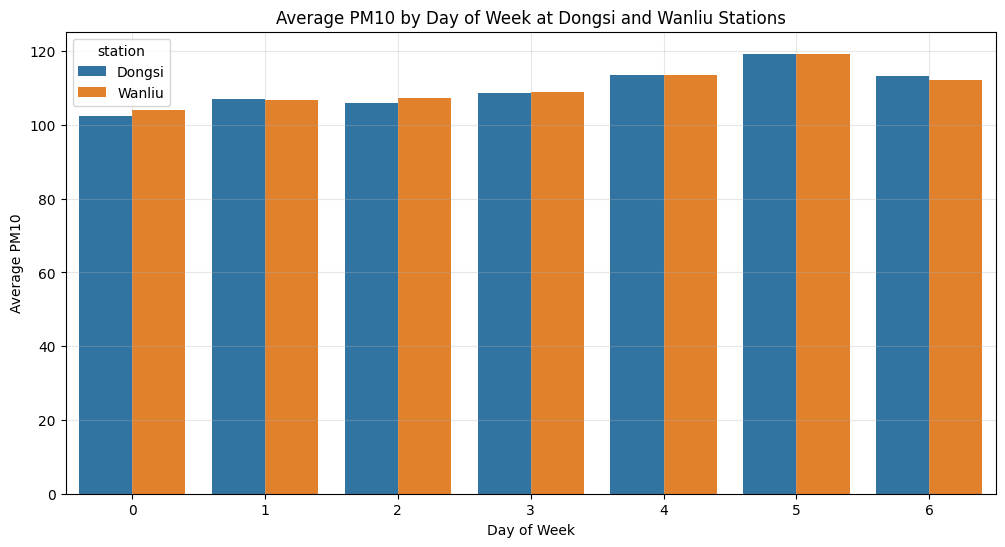

In [64]:
# Weekly Pattern from day_of_week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='PM10', hue='station', data=dow_pm10)
plt.title('Average PM10 by Day of Week at Dongsi and Wanliu Stations')
plt.xlabel('Day of Week')
plt.ylabel('Average PM10')
plt.grid(True, alpha=0.3)
plt.savefig('weekly__pattern.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight Day of Week Pattern**: <br>
- Air Quality Tends to be Worse on Weekends (Days 5 and 6). This suggests that air pollution increases on weekends, possibly due to increased vehicle or industrial activity<br>
- Pattern: The PM10 patterns at both stations are almost identical, suggesting that both are affected by the same pollution sources or similar environmental factors<br>
- Trend: There were no drastic drops or spikes on weekdays (day 0 to day 4), suggesting PM10 pollution was relatively consistent throughout the week<br>

#### 2. Correlation between meteorological factors and PM10 concentration

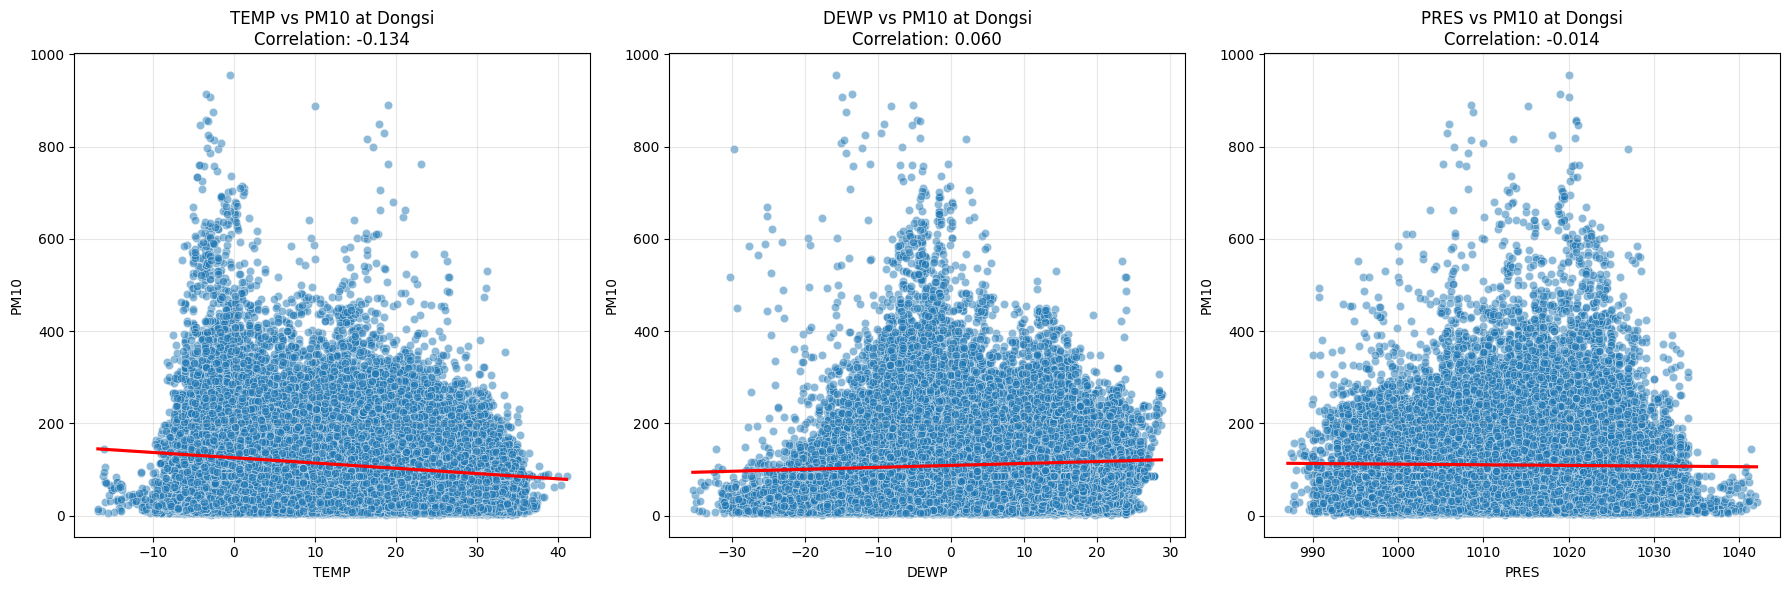

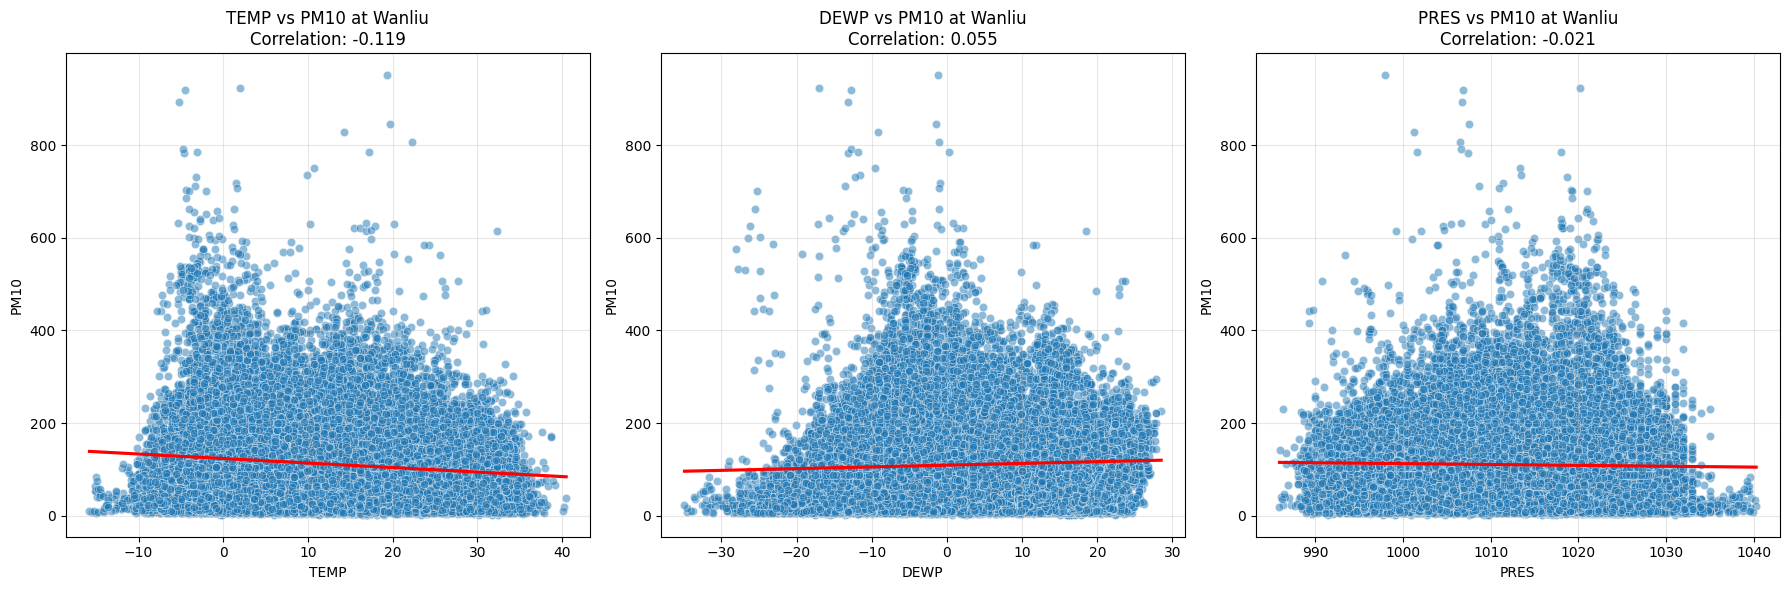

In [56]:
# Create function meo_corr to plot correlation use scatter plots
def meo_corr(station_data, station_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, factor in enumerate(meteo_factors):
        # Calculate correlation coefficient
        corr = station_data['PM10'].corr(station_data[factor])

        # Create scatter plot
        sns.scatterplot(x=factor, y='PM10', data=station_data, ax=axes[i], alpha=0.5)

        # Add regression line
        sns.regplot(x=factor, y='PM10', data=station_data, ax=axes[i],
                   scatter=False, line_kws={"color": "red"})

        axes[i].set_title(f'{factor} vs PM10 at {station_name}\nCorrelation: {corr:.3f}')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{station_name.lower()}_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot for Dongsi
meo_corr(dongsi_data, 'Dongsi')

# Plot for Wanliu
meo_corr(wanliu_data, 'Wanliu')

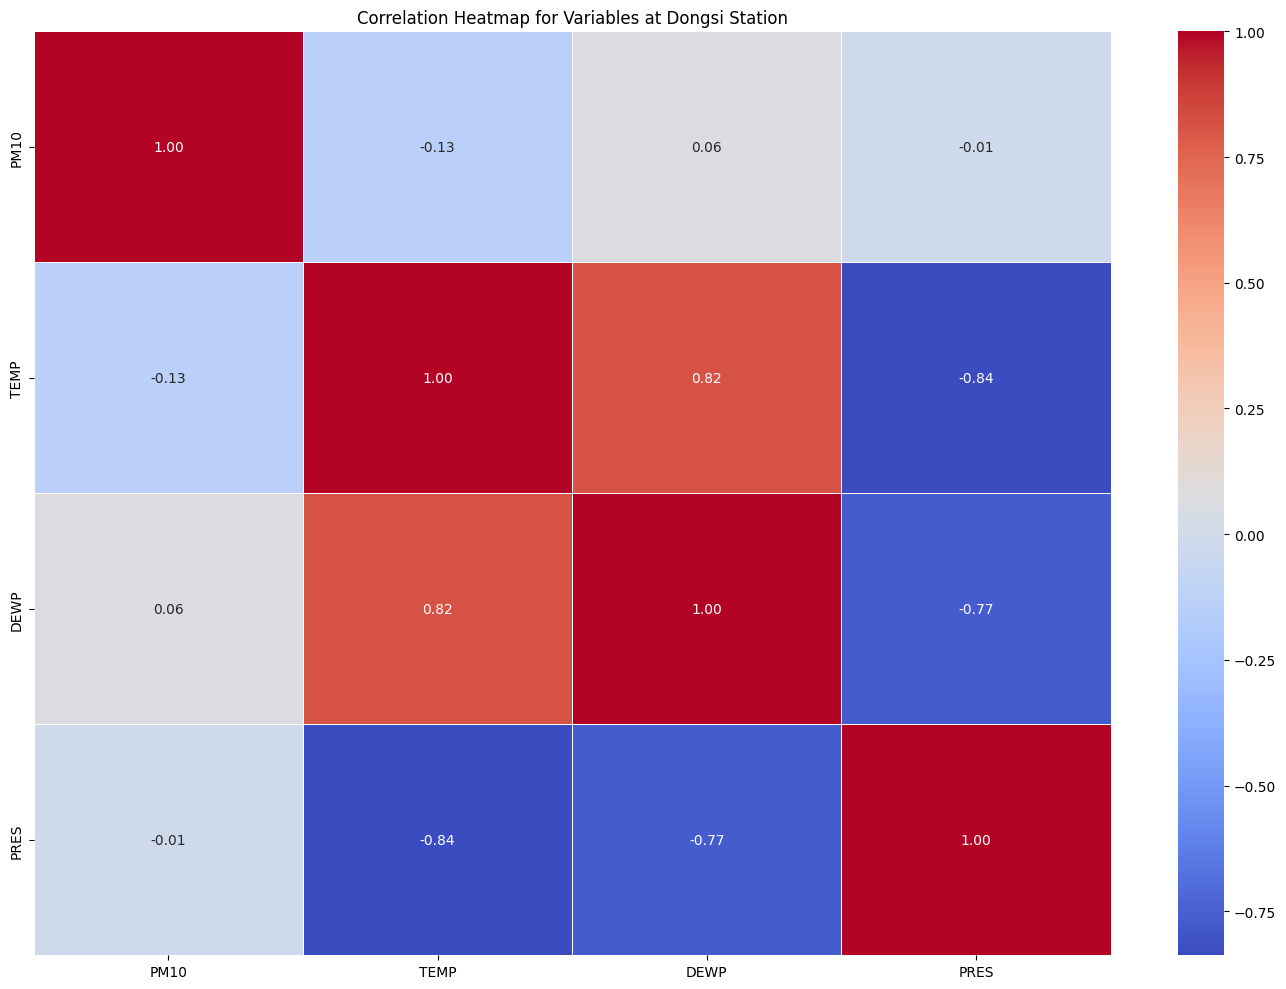

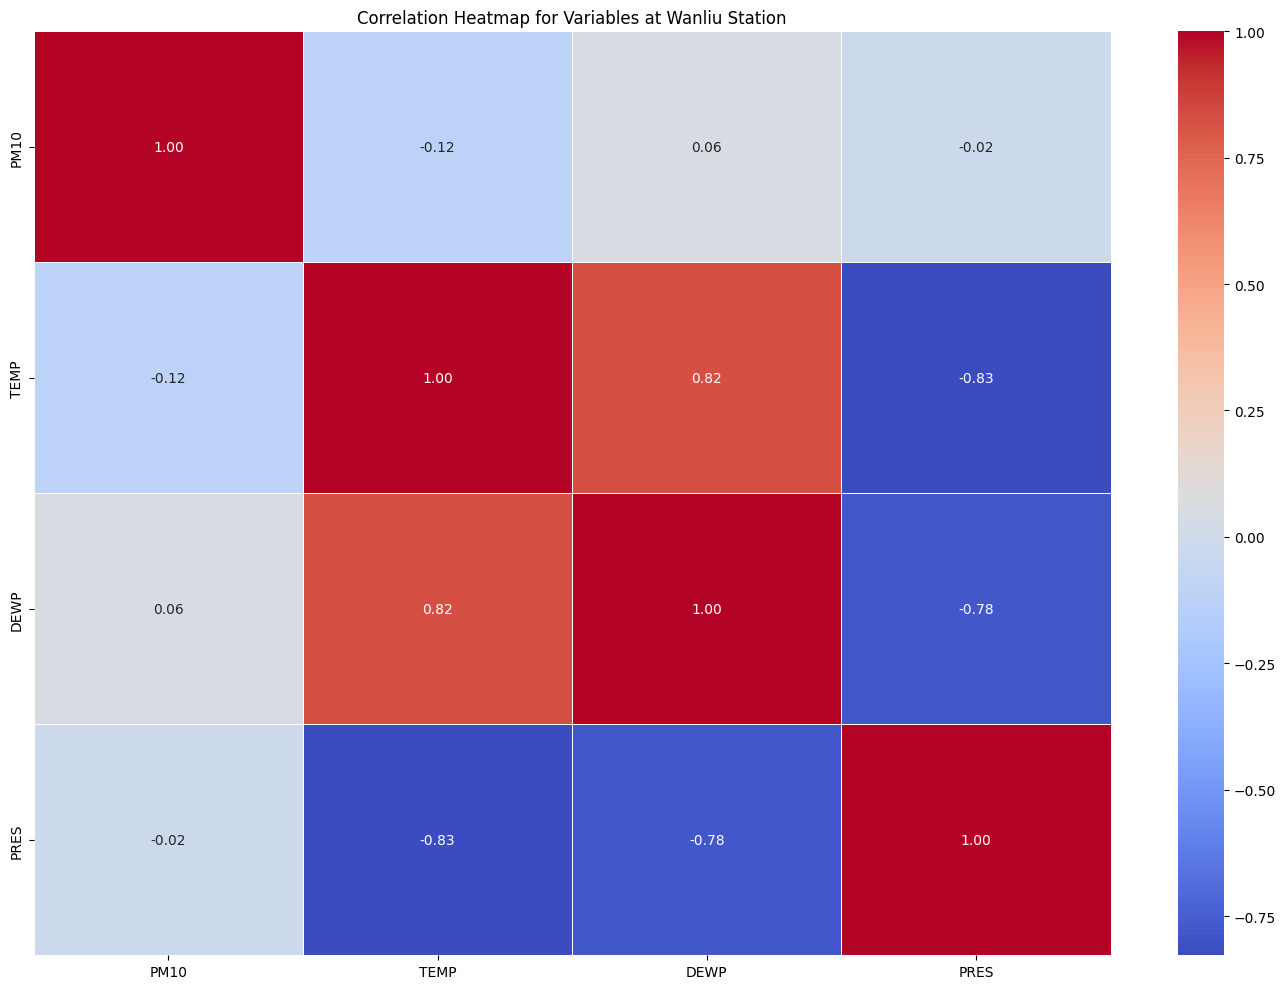

In [65]:
# Heatmap Correlation for both station

# For Dongsi Station
plt.figure(figsize=(14, 10))
sns.heatmap(df[df['station'] == 'Dongsi'][['PM10', 'TEMP', 'DEWP', 'PRES']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Variables at Dongsi Station')
plt.tight_layout()
plt.savefig('dongsi_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# For Wanliu Station
plt.figure(figsize=(14, 10))
sns.heatmap(df[df['station'] == 'Wanliu'][['PM10', 'TEMP', 'DEWP', 'PRES']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Variables at Wanliu Station')
plt.tight_layout()
plt.savefig('wanliu_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight Correlation at Dongsi and Wanliu Station:**<br>

> **Dongsi Station**<br>
1. TEMP (Temperature) vs PM10<br>
Correlation: -0.134 (Weak Negative)<br>
2.  DEWP (Dew Point) vs PM10<br>
Correlation: 0.060 (weak positive)<br>
3. . PRES (Pressure) vs PM10<br>
Correlation: -0.014 (Weak Negative)<br>


>**Wanliu Station**<br>
1. TEMP (Temperature) vs PM10<br>
Correlation: -0.119 (weak negative)<br>
2. DEWP (Dew Point) vs PM10<br>
Correlation: 0.055 (Weak Positive)<br>
3. PRES (Pressure) vs PM10<br>
Correlation: -0.021 (Weak Negative)<br>



> Pattern:<br>
- Pattern: both station almost identical, indicating that the atmospheric conditions at both sites have similar characteristics.<br>
- The correlation between temperature and air pressure was consistently negative, while temperature and dew point showed a strong positive relationship at both stations.<br>



##Further Analyze

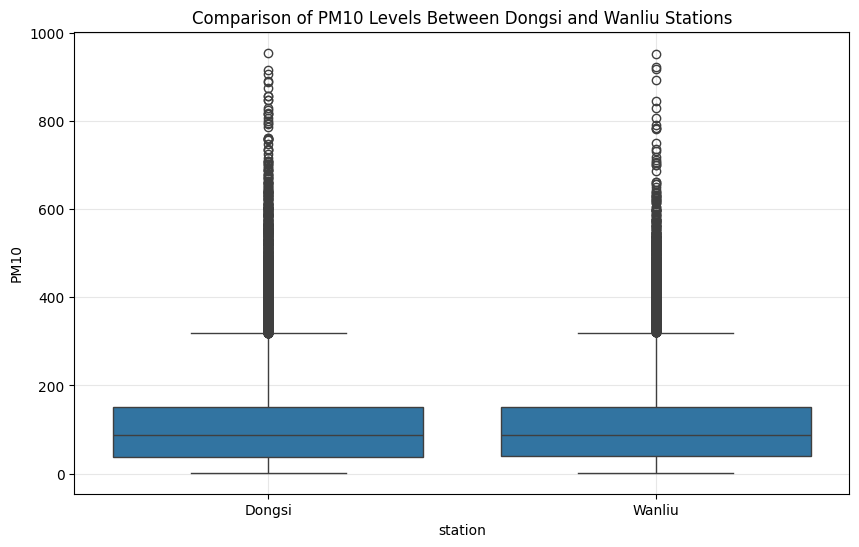

In [60]:
# Compare PM10 levels between stations using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM10', data=df[df['station'].isin(['Dongsi', 'Wanliu'])])
plt.title('Comparison of PM10 Levels Between Dongsi and Wanliu Stations')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.savefig('station_compa_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight Day of Week Pattern**: <br>
- Pattern: There is no significant difference in PM10 levels between Dongsi and Wanliu stations<br>
- FluctuationBoth stations experienced high fluctuations with some extreme pollution events<br>
- The source of air pollution at both locations may be from the same factors, such as environmental conditions or human activities<br>

## Conclusion <br>

The PM10 pollution levels at Dongsi and Wanliu Stations have similar patterns, with high fluctuations and some extreme spikes. There are no significant differences between the two stations, indicating the possibility of similar pollution sources or comparable environmental conditions at both locations<br>

In [70]:
# Statistic of Dongsi
print("\nSummary statistics for PM10 at Dongsi station:")
print(dongsi_data['PM10'].describe())

# Statistic of Wanliu
print("\nSummary statistics for PM10 at Wanliu station:")
print(wanliu_data['PM10'].describe())


Summary statistics for PM10 at Dongsi station:
count    35064.000000
mean       109.968694
std         97.485608
min          2.000000
25%         38.000000
50%         87.000000
75%        150.000000
max        955.000000
Name: PM10, dtype: float64

Summary statistics for PM10 at Wanliu station:
count    35064.000000
mean       110.274567
std         92.442423
min          2.000000
25%         40.000000
50%         88.000000
75%        152.000000
max        951.000000
Name: PM10, dtype: float64


### 1. What is the daily pattern of PM10 concentrations at Dongsi and Wanliu stations for the period 2013-2017?<br>


> Pattern:<br>
- KPM10 concentrations tend to increase in the morning (possibly due to human activities such as traffic and industry). PM10 peaks usually occur during morning rush hours and in the evening<br>
- A decrease in PM10 is seen during the day when pollutant dispersion is wider due to increased temperature and atmospheric turbulence<br>
- This pattern is consistent at both stations (Dongsi and Wanliu), suggesting that they experience similar environmental dynamics<br>


📌Summary:<br>
There is a clear daily cyclical pattern where PM10 concentrations increase in the mornings and evenings, while the lowest concentrations usually occur during the day<br>

### 2. Is there a correlation between meteorological factors (TEMP, DEWP, and PRES) and PM10 concentration levels at the two stations (Dongsi and Wanliu)?<br>



> Correlation TEM (Temperature) :<br>
- Negative Relationship: As temperatures increase, PM10 concentrations tend to decrease due to increased air turbulence that helps disperse pollutants<br>



> Correlation DEWP (Dew Point):<br>
- Weak Positive Relationship: High humidity (indicated by high dew point) can cause an increase in PM10 through atmospheric chemical reactions and particle binding<br>



> Correlation PRES (Pressure):<br>
- Positive Relationship: High pressure is often associated with air stagnation, which exacerbates the accumulation of PM10<br>


📌Summary:<br>
- TEMP (Temperature) has a negative relationship with PM10 (higher temperature → lower PM10)<br>
- PRES (Pressure) has a positive relationship (higher pressure → higher PM10)<br>
- DEWP (Dew point) has a variable relationship depending on the specific conditions<br>
